System comes to rest at t = 6.480


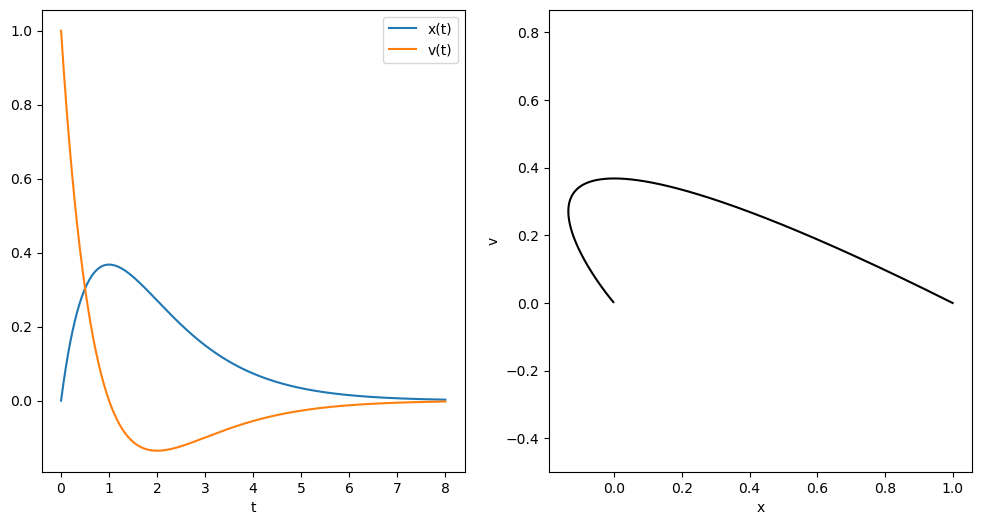

In [4]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from pathlib import Path


def damped_pendulum(t, y, b, omega0):
    x, v = y
    dxdt = v
    dvdt = -b*v - (omega0**2)*x
    dydt = np.array([dxdt, dvdt])
    return dydt

# define a lambda function in a proper program that takes these arguments
lfun = lambda t, y, : damped_pendulum(t, y, b, omega0)

# Function to check if the system is at rest
def is_at_rest(x, v, epsilon_x=1e-2, epsilon_v=1e-2):
    return np.abs(x) < epsilon_x and np.abs(v) < epsilon_v


# Define the initial parameters
x0 = 0  # initial position
v0 = 1  # initial velocity
y0 = (x0, v0)  # initial state
t0 = 0  # initial time

b = 2  # damping coefficient
omega0 = 1  # natural frequency

# Define the final time and the number of time steps
tf = 8 #50*np.pi  # final time
n = 1001  # Number of points at which output will be evaluated
# Note: this does not mean the integrator will take only n steps
# Scipy will take more steps if required to control the error in the solution

# Create an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

# Calls the method integrate.solve_ivp()
result = integrate.solve_ivp(fun=lfun,  # The function defining the derivative
                             t_span=(t0, tf),  # Initial and final times
                             y0=y0,  # Initial state
                             method="RK45",  # Integration method
                             t_eval=t)  # Time points for result to be defined at

# Read the solution and time from the result array returned by Scipy
x, v = result.y
t = result.t

# Check if the system has come to rest
for i in range(len(t)):
    if is_at_rest(x[i], v[i]):
        print(f"System comes to rest at t = {t[i]:.3f}")
        break

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot position and velocity as a function of time
ax[0].plot(t, x, label=r"x(t)")
ax[0].plot(t, v, label=r"v(t)")
ax[0].set_xlabel(r"t")
ax[0].legend(loc=1)

# Create a phase space plot (v vs x)
ax[1].plot(v, x, 'k')
ax[1].axis('equal')
ax[1].set_xlabel(r"x")
ax[1].set_ylabel(r"v")

# Show the plot
plt.show()
